<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded.


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Even though both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride.

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones
* Visualize results on a nice dashboard

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here:

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Clustering is your friend

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly`

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well.


### Start small grow big

Even though Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach.

## Deliverable 📬

To complete this project, your team should:

* Have a map with hot-zones using any python library (`plotly` or anything else).
* You should **at least** describe hot-zones per day of week.
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan.

Your maps should look something like this:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [30]:
!wget "https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip"

--2023-12-04 10:45:29--  https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip
Resolving full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com (full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com)... 3.5.226.172, 52.95.154.60
Connecting to full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com (full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com)|3.5.226.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101042186 (96M) [application/zip]
Saving to: ‘uber-trip-data.zip.1’

uber-trip-data.zip. 100%[===================>]  96.36M  27.8MB/s    in 3.5s    

2023-12-04 10:45:33 (27.8 MB/s) - ‘uber-trip-data.zip.1’ saved [101042186/101042186]



In [31]:
!unzip uber-trip-data.zip

Archive:  uber-trip-data.zip
replace __MACOSX/._uber-trip-data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._uber-trip-data  
  inflating: uber-trip-data/taxi-zone-lookup.csv  
  inflating: __MACOSX/uber-trip-data/._taxi-zone-lookup.csv  
  inflating: uber-trip-data/uber-raw-data-janjune-15.csv.zip  
  inflating: __MACOSX/uber-trip-data/._uber-raw-data-janjune-15.csv.zip  
  inflating: uber-trip-data/uber-raw-data-apr14.csv  
  inflating: __MACOSX/uber-trip-data/._uber-raw-data-apr14.csv  
  inflating: uber-trip-data/uber-raw-data-aug14.csv  
  inflating: __MACOSX/uber-trip-data/._uber-raw-data-aug14.csv  
  inflating: uber-trip-data/uber-raw-data-sep14.csv  
  inflating: __MACOSX/uber-trip-data/._uber-raw-data-sep14.csv  
  inflating: uber-trip-data/uber-raw-data-jul14.csv  
  inflating: __MACOSX/uber-trip-data/._uber-raw-data-jul14.csv  
  inflating: uber-trip-data/uber-raw-data-jun14.csv  
  inflating: __MACOSX/uber-trip-data/._uber-raw-data-jun14.csv  
  inflatin

In [32]:
locations = pd.read_csv("/content/uber-trip-data/taxi-zone-lookup.csv")
locations.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


We'll limit our analysis to the month of April 2014, but assuming the data has been collected identically each month, all steps will be easily reproductible for another time period.

In [33]:
df = pd.read_csv("/content/uber-trip-data/uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# 1. EDA and data preprocessing

In [34]:
print(f"Number of rows : {df.shape[0]}")
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 564516

Display of dataset: 


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512



Basics statistics: 


,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN



Percentage of missing values: 


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

There are no missing values so there is no need to impute data or drop null values.

We'll drop the column "Base" as it has no use in our case study.

Since the purpose of our analysis is to provide daily and hourly recommendations, we'll transform the timestamp column into a more appropriate format.

In [35]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['day'] = df['Date/Time'].dt.day
df['dayofweek'] = df['Date/Time'].dt.dayofweek
df['hour'] = df['Date/Time'].dt.hour
df = df.drop(["Date/Time", "Base"], axis=1)
df.head()

,Lat,Lon,day,dayofweek,hour
0,40.7690,-73.9549,1,1,0
1,40.7267,-74.0345,1,1,0
2,40.7316,-73.9873,1,1,0
3,40.7588,-73.9776,1,1,0
4,40.7594,-73.9722,1,1,0


Let's look at the distribution of rides throughout the month of April 2014.

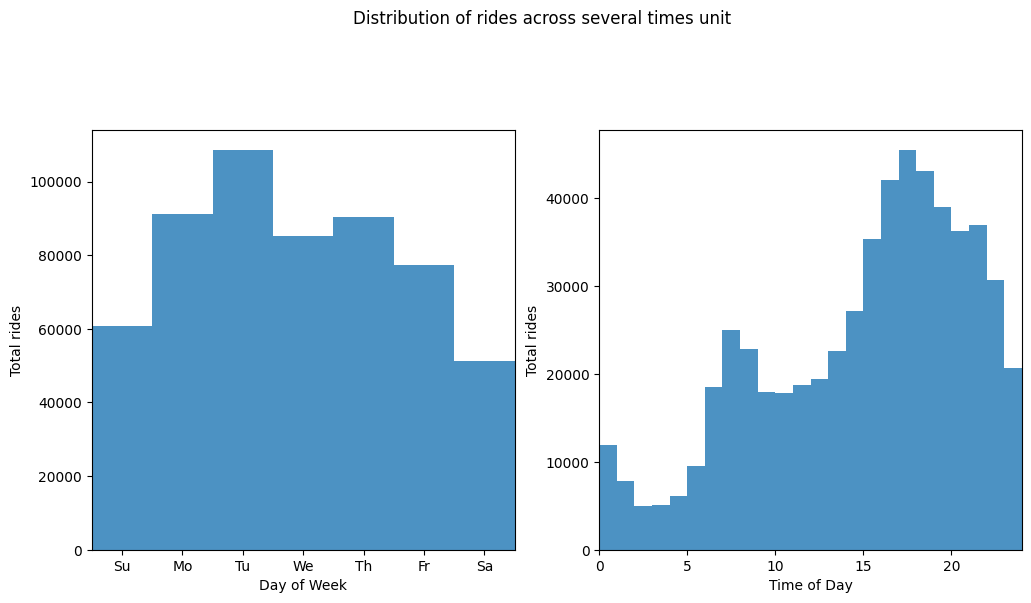

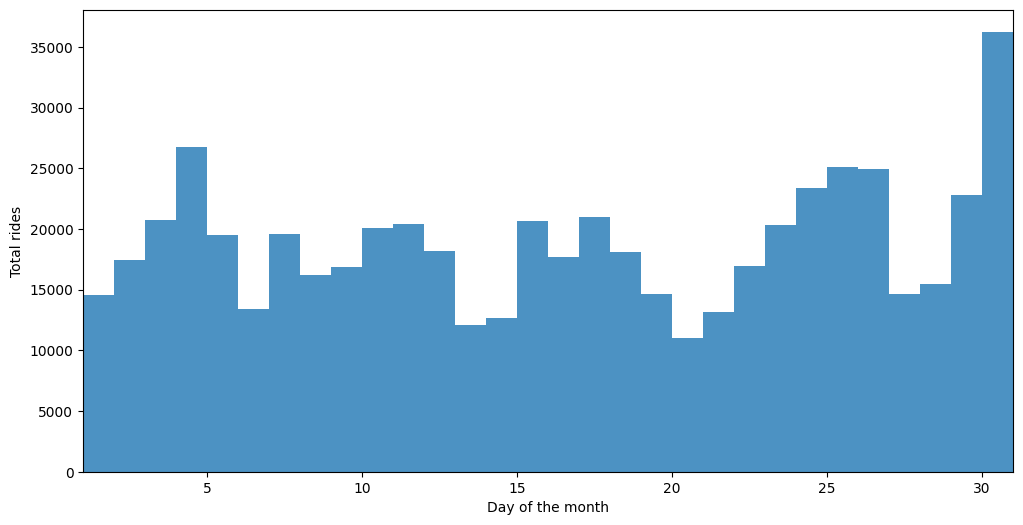

In [36]:
fig = plt.figure(figsize=(12,12))
fig.suptitle("Distribution of rides across several times unit")

ax = fig.add_subplot(221)
ax.hist(df.dayofweek, bins=7, range=[0,7], alpha=0.8)
ax.set_xlabel('Day of Week')
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5])
ax.set_xticklabels(['Su','Mo','Tu','We','Th','Fr','Sa'])
ax.set_ylabel('Total rides')
ax.set_xlim([0,7])

ax = fig.add_subplot(222)
ax.hist(df.hour, bins=24, range=[0,24], alpha=0.8)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total rides')
ax.set_xlim([0,24])

fig = plt.figure(figsize=[12,6])
plt.hist(df.day, bins=30, range=[1,31], alpha=0.8)
plt.xlabel('Day of the month')
plt.ylabel('Total rides')
plt.xlim([1,31])
plt.show()

Rides tend to be concentrated in the late afternoon and evening, with a smaller rush hour between 7 and 10 A.M., and are significantly lower in the early hours of the morning.

It seems that Tuesdays are the busiest days of the week. On the contrary, Saturdays are the quietest.

This is confirmed on the monthly distribution, with decreses for every weekend of the month.

Based on this, we can assume many users ride with Uber to commute to and back from work.

The last day of the month saw a susbtantiel increase in rides. We couldn't find a valid explanation for it, perhaps an event was taking place on that day?

We'll pick a day to visualize the Uber traffic localisation in New York City. In order to make this more interesting (and later see the difference it makes with our hotspots) let's choose a busy one! So, according to our previous analysis, the 4th of April looks like a good pick.

In [37]:
df_fourth = df[df["day"] == 4]
len(df_fourth)

26714

There were 26714 Uber rides that day, this will be more than enough to train our algorithms.

In [38]:
# Dropped because of imprecise continuous colorscale

# fig = px.scatter_mapbox(
#         df_fourth,
#         lat="Lat",
#         lon="Lon",
#         color = "hour",
#         color_discrete_sequence = color_map,
#         mapbox_style="carto-positron"
# )

# fig.show()

In [39]:
color_scale = px.colors.qualitative.Alphabet
# color_map = {hour: color_scale[i in color_scale] for i, hour in enumerate(range(24))}

trace = go.Scattermapbox(
    lat=df_fourth['Lat'],
    lon=df_fourth['Lon'],
    mode='markers',
    marker=dict(
        size=10,
        color=df_fourth['hour'],
        colorscale=color_scale,
        colorbar=dict(title='Hour of the day'),
    )
)
center_lat = df_fourth['Lat'].mean()
center_lon = df_fourth['Lon'].mean()

layout = go.Layout(
    mapbox=dict(
        style='carto-positron',
        zoom=9,
        center=dict(lat=center_lat, lon=center_lon)
    ),
    title='Uber rides traffic in New York on April, 4th 2014'
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

# 2. Clustering to identify hotspots on a given day and hour

As we can infer from the previous graph, it is not easy to identify the particular areas of the city that are in high demand at a certain time of the day. In order to get actionable information, we'll perform clustering , using 2 different algorithms : K-Means and DBSCAN.

These algorithms will sort all rides locations into clusters (groups of points with neighbour coordinates) and discard outliers. After that, we'll plot each cluster to visualize the hotpoints.

This will allow us to precisely identify locations which experience a high volume of activity during a specified time frame.

## 2.1. Preparing a subset

Following the project's guidelines, we'll first pick one specific hour of one specific day and scale from there; we'll keep working on April 4th, let's see which hour of the has the highest number of rides.

In [40]:
busiest_hour = df_fourth["hour"].value_counts().index.tolist()[0]
print(busiest_hour)

18


In [41]:
X = df_fourth[df_fourth["hour"] == busiest_hour]
X = X.drop(["day", "dayofweek", "hour"], axis = 1)
print(f"Our training dataset has {len(X)} rows")
X.head()

Our training dataset has 2449 rows


,Lat,Lon
4940,40.7182,-74.0029
4941,40.7649,-73.9766
4942,40.7326,-74.0081
4943,40.6859,-73.9725
4944,40.7367,-74.0100


In [42]:
trace = go.Scattermapbox(
    lat=X['Lat'],
    lon=X['Lon'],
    mode='markers',
    marker=dict(
        size=10,
    )
)
center_lat = X['Lat'].mean()
center_lon = X['Lon'].mean()

layout = go.Layout(
    mapbox=dict(
        style='carto-positron',
        zoom=9,
        center=dict(lat=center_lat, lon=center_lon)
    ),
    title='Uber rides traffic in New York on April, 4th 2014, at 6PM'
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

Now we have our training subset with only coordinates, let's train our models.

## 2.2. K-Means

To train our model, we need to know the optimum number of clusters to choose.

To do so, let's create a loop that will collect the Within-sum-of-square (wcss, square distance from each data point to its centroid) for each value, with the .inertia_ parameter, and use the elbow method to check how close data points within a cluster are to their centroids.

In [43]:
wcss = []
k = []
for i in range (2,10):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto").fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 3.3100913587418064
WCSS for K=3 --> 2.0269043702071072
WCSS for K=4 --> 1.7088463020099667
WCSS for K=5 --> 1.4617191933412093
WCSS for K=6 --> 1.1759889371524155
WCSS for K=7 --> 1.1430388663190822
WCSS for K=8 --> 0.7813847142749633
WCSS for K=9 --> 0.6602775793222279


In [44]:
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster count"
)

fig.show()

It's hard to identify a clear elbow, so let's use the silhouette method to check if clusters are far from each other, to refine our hypothesis.

In [45]:
sil = []
k = []

for i in range (2,11):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.43097904683960814
Silhouette score for K=3 is 0.4580959289458338
Silhouette score for K=4 is 0.3876002286790853
Silhouette score for K=5 is 0.38634922221026424
Silhouette score for K=6 is 0.3928831637288409
Silhouette score for K=7 is 0.3927808618291315
Silhouette score for K=8 is 0.41672236996328194
Silhouette score for K=9 is 0.39970960184849375
Silhouette score for K=10 is 0.3949364137287092


In [46]:
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

fig = px.bar(data_frame=cluster_scores,
             x=k,
             y=cluster_scores.iloc[:, -1]
            )

fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster count"
)
fig.show()

In [47]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([995, 859,  20,   4, 404, 138,  27,   2]))

In [48]:
X_clusters = X.copy(deep=True)
X_clusters["kmeans_cluster"] = kmeans.labels_
X_clusters.head()

,Lat,Lon,kmeans_cluster
4940,40.7182,-74.0029,1
4941,40.7649,-73.9766,0
4942,40.7326,-74.0081,1
4943,40.6859,-73.9725,5
4944,40.7367,-74.0100,1


In [49]:
kmeans_centroids = kmeans.cluster_centers_
X_clusters["kmeans_centroid_lat"] = X_clusters["kmeans_cluster"].apply(lambda x : kmeans_centroids[x][0])
X_clusters["kmeans_centroid_lon"] = X_clusters["kmeans_cluster"].apply(lambda x : kmeans_centroids[x][1])

X_clusters = pd.DataFrame(
    X_clusters.pivot_table(
        index = ['kmeans_cluster', 'kmeans_centroid_lat', 'kmeans_centroid_lon'],
        aggfunc ='size'
                  )).reset_index().rename(columns = {0 : "count"}).astype({'kmeans_cluster':'string'})

In [50]:
X_clusters

,kmeans_cluster,kmeans_centroid_lat,kmeans_centroid_lon,count
0,0,40.754480,-73.981169,995
1,1,40.728051,-74.000615,859
2,2,40.647045,-73.782610,20
3,3,40.717725,-74.264650,4
4,4,40.776356,-73.960066,404
5,5,40.690341,-73.970099,138
6,6,40.783456,-73.861089,27
7,7,40.754600,-73.492350,2


Now let's plot our clusters and visualize our hotspots!

In [51]:
# color_scale = px.colors.qualitative.Plotly
# color_map = {cluster: color for color, cluster in zip(color_scale, X_clusters["kmeans_cluster"])}
# X_clusters["color"] = color_map.values()

# trace = go.Scattermapbox(
#     lat=X_clusters['kmeans_centroid_lat'],
#     lon=X_clusters['kmeans_centroid_lon'],
#     mode='markers',
#     marker=dict(
#         size=(X_clusters["count"]/20),
#         color = X_clusters["color"],
#         colorbar=dict(title='Cluster'),
#         cmin=0,
#         cmax=7
#     )
# )
# center_lat = X['Lat'].mean()
# center_lon = X['Lon'].mean()

# layout = go.Layout(
#     mapbox=dict(
#         style='carto-positron',
#         zoom=9,
#         center=dict(lat=center_lat, lon=center_lon)
#     ),
#     title='Pickup hotspots in New York on April, 4th 2014, at 6PM'
# )

# fig = go.Figure(data=[trace], layout=layout)

# fig.show()

# trace = go.Scattermapbox(
#     lat=X_clusters['kmeans_centroid_lat'],
#     lon=X_clusters['kmeans_centroid_lon'],
#     mode='markers',
#     marker=dict(
#         size=(X_clusters["count"]/20),
#         color = X_clusters["kmeans_cluster"],
#         colorscale = color_scale,
#         colorbar=dict(title='Cluster')
#     )
# )
# center_lat = X['Lat'].mean()
# center_lon = X['Lon'].mean()

# layout = go.Layout(
#     mapbox=dict(
#         style='carto-positron',
#         zoom=9,
#         center=dict(lat=center_lat, lon=center_lon)
#     ),
#     title='Pickup hotspots in New York on April, 4th 2014, at 6PM'
# )

# fig = go.Figure(data=[trace], layout=layout)

# fig.show()

In [82]:
fig = px.scatter_mapbox(X_clusters,
                        lat="kmeans_centroid_lat",
                        lon="kmeans_centroid_lon",
                        hover_name="kmeans_cluster",
                        color = "kmeans_cluster",
                        labels={"kmeans_cluster" : "Clusters"},
                        size="count",
                        size_max=30)
fig.update_layout(
    mapbox=dict(
        style='carto-positron',
        zoom=10,
        center=dict(lat=center_lat, lon=center_lon)
    ),
    title='Pickup hotspots in New York on April, 4th 2014, at 6PM'
)

fig.show()

We can easily visualize the areas that were the most in demand for uber pickups, on April, 4th 2014, at 6PM. All that's left to do now is reproduce this step by step for any unit of time (day of the week, hour, day of the month...).

## 2.3. DBSCAN

Scikit-learn's DBSCAN algorithm clusters spatial data set based on two parameters: physical distance from each point, and a minimum cluster size.

We'll keep working on our X data sample regrouping all pickups from April, 4th 2014, at 6PM.

In [53]:
coords = X.to_numpy()
db = DBSCAN(eps=0.30/6371, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
labels = db.labels_
np.unique(db.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([ 195, 2182,   18,    9,    6,    9,    6,    6,    8,   10]))

In [54]:
X_dbscan = X.copy(deep=True)
X_dbscan["dbscan_cluster"] = db.labels_
X_dbscan["dbscan_cluster"] = X_dbscan["dbscan_cluster"].astype({"dbscan_cluster":'string'})

In [55]:
fig = px.scatter_mapbox(X_dbscan,
                        lat="Lat",
                        lon="Lon",
                        hover_name="dbscan_cluster",
                        color = "dbscan_cluster",
                        labels={"dbscan_cluster" : "Clusters"},
                        size_max=30)
fig.update_layout(
    mapbox=dict(
        style='carto-positron',
        zoom=10,
        center=dict(lat=center_lat, lon=center_lon)
    ),
    title='Pickup hotspots in New York on April, 4th 2014, at 6PM'
)

fig.show()

One drawback of DBSCAN is that we do not obtain cluster centroids. While it may be advantageous for certain problematics, in our case the cluster centroids allow us to visualize the geographic position on the hotspots on a map, which seems the better approach to give professional Uber drivers the coordinates of an optimal location to rapidly reach any pick-up request within a limited perimeter.

Even though we can still identify our clusters, the other issue here is how imabalanced in density our clusters are. The extremely high concentration of pickups downtown means there is no way to find an optimal set of parameters that will better discriminate clusters within New York City center, and if we increase min_samples parameters, all other clusters except the main one tend to disappear.

In addition, K-Means allows use the total number of pickups in an individual cluster as a metric for sizing the hot spot locations, to visualize the intensity of each hot spot.

In conclusion, K-Means seems more adapted to our problematic. Other options worth trying out would be adaptive multi-density algorithms like AMD-DBSCAN or HDBSCAN.

# 3. Predictions

## 3.1. Hot spots per day of the month

In [93]:
df_sample = df.sample(20000)

centroids_df = pd.DataFrame(columns=['day', 'centroid_lat', 'centroid_lon', 'cluster'])

for date, day_df in df_sample.groupby('day'): #df_sample.groupby('day'): grouped df where each iteration is a subset where day = date
    day_df = day_df.drop(["dayofweek", "hour"], axis=1)
    coordinates = day_df[['Lat', 'Lon']]

     # Find the optimal number of clusters using silhouette score
    # silhouette_scores = []
    # cluster_range = range(2, 11)

    # for n_clusters in cluster_range:
    #     kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    #     cluster_labels = kmeans.fit_predict(coordinates)
    #     silhouette_avg = silhouette_score(coordinates, cluster_labels)
    #     silhouette_scores.append(silhouette_avg)

    # optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

    # kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0, n_init='auto')
    kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
    day_df['cluster'] = kmeans.fit_predict(coordinates) # or kmeans.labels_

    day_centroids = day_df.copy(deep=True)
    centroids = kmeans.cluster_centers_
    day_centroids["centroid_lat"] = day_centroids["cluster"].apply(lambda x : centroids[x][0])
    day_centroids["centroid_lon"] = day_centroids["cluster"].apply(lambda x : centroids[x][1])

    day_centroids = pd.DataFrame(
        day_centroids.pivot_table(
            index = ['day', 'cluster', 'centroid_lat', 'centroid_lon'],
            aggfunc ='size'
                  )).reset_index().rename(columns = {0 : "count"}).astype({'cluster':'string'})

    centroids_df = pd.concat([centroids_df, day_centroids], ignore_index=True)

In [94]:
centroids_df.head(20)

,day,centroid_lat,centroid_lon,cluster,count
0,1,40.756770,-73.978342,0,249.0
1,1,40.662780,-74.201760,1,5.0
2,1,40.784227,-73.882554,2,26.0
3,1,40.714556,-73.992930,3,214.0
4,1,40.650625,-73.791606,4,16.0
5,2,40.823442,-73.828505,0,19.0
6,2,40.719413,-73.994970,1,284.0
7,2,40.702036,-74.235764,2,14.0
8,2,40.645333,-73.801517,3,12.0
9,2,40.763757,-73.974778,4,298.0


In [86]:
center_lat = centroids_df['centroid_lat'].mean()
center_lon = centroids_df['centroid_lon'].mean()

fig = px.scatter_mapbox(
    centroids_df,
    lat='centroid_lat',
    lon='centroid_lon',
    hover_name='cluster',
    color='cluster',
    labels={'cluster': 'Clusters'},
    size='count',
    size_max=50,
    animation_frame='day',
)

fig.update_layout(
    mapbox=dict(
        style='carto-positron',
        zoom=9,
        center=dict(lat=center_lat, lon=center_lon),
    ),
    title='Pickup hotspots in New York in April, day by day',
)

fig.show()

# 3.2. Generalization

Now that we know how to get hotspots for a defined timeframe, let's write a function to generalize our approach and allow the user to obtain hotspots for a given data subset.

We'll work with K-means only for this part as it previously proved to be the most suitable algorithm for our purpose.

In [ ]:
def filter_dataframe(dataframe, hour=None, day=None, dayofweek=None, month=None):
    """
    Filter a dataframe based on specified conditions.

    Parameters:
    - dataframe (pd.DataFrame): The input dataframe.
    - month (int or None): Month value for filtering (if working on datasets with more than 1 month of data)
    - day (int or None): Day value for filtering.
    - dayofweek (int or None): Day of the week value (0-6, where Monday is 0) for filtering.
    - hour (int or None): Hour value for filtering.

    Returns:
    - pd.DataFrame: Filtered dataframe.
    """
    conditions = []

    if month is not None:
        conditions.append(dataframe['month'] == month)

    if day is not None:
        conditions.append(dataframe['day'] == day)

    if dayofweek is not None:
        conditions.append(dataframe['dayofweek'] == dayofweek)

    if hour is not None:
        conditions.append(dataframe['hour'] == hour)

    if conditions:
        # Use logical AND to combine conditions
        final_condition = conditions[0] if len(conditions) == 1 else functools.reduce(lambda x, y: x & y, conditions)
        filtered_dataframe = dataframe[final_condition]
        return filtered_dataframe
    else:
        # No filtering conditions specified, return the original dataframe
        return dataframe

# Example usage:
# Assuming you have a DataFrame called 'your_dataframe'
# filtered_df = filter_dataframe(your_dataframe, dayofweek=4)

In [ ]:
def get_hotspots(df, frequency='day', n_clusters=5, sample_size=20000):
    """
    Predict clusters for a specified dataframe using K-Means algorithm and return the clusters centroids' coordinates.
    Assumes that all datasets provided within the scope of this project are identically formatted.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - frequency (str): The time measure by which to provide hotspots. Options: 'month', 'dayofweek', 'day', 'hour'.
    - n_clusters (int): The number of clusters to identify using K-Means algorithm.
    - sample_size (int): The number of data points to sample from the input dataframe. If None, the entire dataframe is used.

    Returns:
    - pd.DataFrame: A dataframe containing, for each cluster determined by the algorithm, the centroids coordinates and the total count of data points per cluster.
    """
    # Check DataFrame size
    # if 0 # if > 20000

    # Sample the DataFrame if needed
    df_sample = df.sample(sample_size) if sample_size is not None else df

    # Check if the chosen frequency is valid
    valid_frequencies = {'hour', 'day', 'dayofweek', 'month'}

    if frequency not in valid_frequencies:
      raise ValueError(f"Invalid frequency: {frequency}")

    # Get the time column name
    time_column_name = frequency

    # Initialize the centroids DataFrame
    centroids_df = pd.DataFrame(columns=[frequency, 'cluster', 'centroid_lat', 'centroid_lon', 'count'])

    for time_value, time_df in df_sample.groupby(time_column_name):
        # Drop unnecessary columns
        columns_to_drop = set(valid_frequencies) - set([frequency])
        time_df = time_df.drop(columns=columns_to_drop)

        # Extract coordinates
        coordinates = time_df[['Lat', 'Lon']]

        # Perform K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
        time_df['cluster'] = kmeans.fit_predict(coordinates)

        # Create a DataFrame with cluster centroids and counts
        centroids = kmeans.cluster_centers_
        time_df["centroid_lat"] = time_df["cluster"].apply(lambda x : centroids[x][0])
        time_df["centroid_lon"] = time_df["cluster"].apply(lambda x : centroids[x][1])
        time_centroids = pd.DataFrame(
            time_df.pivot_table(
                index=[frequency, 'cluster', "centroid_lat", "centroid_lon"],
                aggfunc='size'
                )).reset_index().rename(columns={0: "count"}).astype({'cluster':'string'})

        # Append to the main centroids DataFrame
        centroids_df = pd.concat([centroids_df, time_centroids], ignore_index=True)

    return centroids_df

In [ ]:
def plot_hotspots(df, frequency='day'):
  """
  Dynamically plots hotspots based on a specified dataframe containing hotspots coordinates per chosen frequency.

  Parameters:
    - df (pd.DataFrame): The input dataframe.
    - frequency (str): The time measure by which to provide hotspots. Options: 'month', 'dayofweek', 'day', 'hour'.
  """
  center_lat = df['centroid_lat'].mean()
  center_lon = df['centroid_lon'].mean()

  fig = px.scatter_mapbox(
      df,
      lat='centroid_lat',
      lon='centroid_lon',
      hover_name='cluster',
      color='cluster',
      labels={'cluster': 'Clusters'},
      size='count',
      size_max=50,
      animation_frame=frequency,
  )

  fig.update_layout(
      mapbox=dict(
        style='carto-positron',
        zoom=9,
        center=dict(lat=center_lat, lon=center_lon),
        ),
      title='Pickup hotspots in New York in April, day by day',
      )

  fig.show()

# Conclusion


In this project, we have tried several approaches to recommend pickup hotspots for UBER drivers to quickly respond to requests.

We have decided to use a K-Means clustering algorithms, providing coordinates for hotspots (clusters centroids).

We have defined generalized functions to provide hotspots based on a user's chosen timeframe.

The results may now be used to help predict hotspot for a given period in the future, and improve UBER's performances regarding user's waiting time.



In [95]:
# Last but not least : let's create our requirements.txt file for this notebook :
!pip3 freeze > requirements.txt